In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
from global_land_mask import globe
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

# JJAS means every year

In [3]:
a = '/media/rakshith/Seagate Expansion Drive/mraks/pr_wtr.nc'
ds1 = xr.open_dataset(a)

In [4]:
jjas = ds1.time.dt.month.isin(range(6, 10)) #Works only if time is a datetime object
clim = ds1.sel(time=jjas) #ds with only JJAS months

In [5]:
clim2 = clim.groupby('time.year').mean('time')

In [6]:
clim3 = clim2.sel(lat=slice(30, 10), lon=slice(70,90)).mean(dim=['lat', 'lon'])

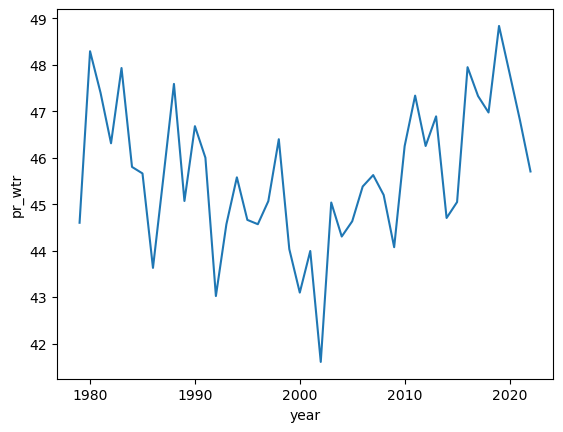

In [52]:
clim3.pr_wtr.plot()

In [7]:
deca = ds1.pr_wtr.sel(time='1979-01-01', lat=slice(30, 10), lon=slice(70,90))

In [8]:
lon_grid, lat_grid = np.meshgrid(deca.lon, deca.lat) #creating a land sea mask
mask2 = globe.is_land(lat_grid, lon_grid)

In [9]:
#All matplotlib colourschemes
clr = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']

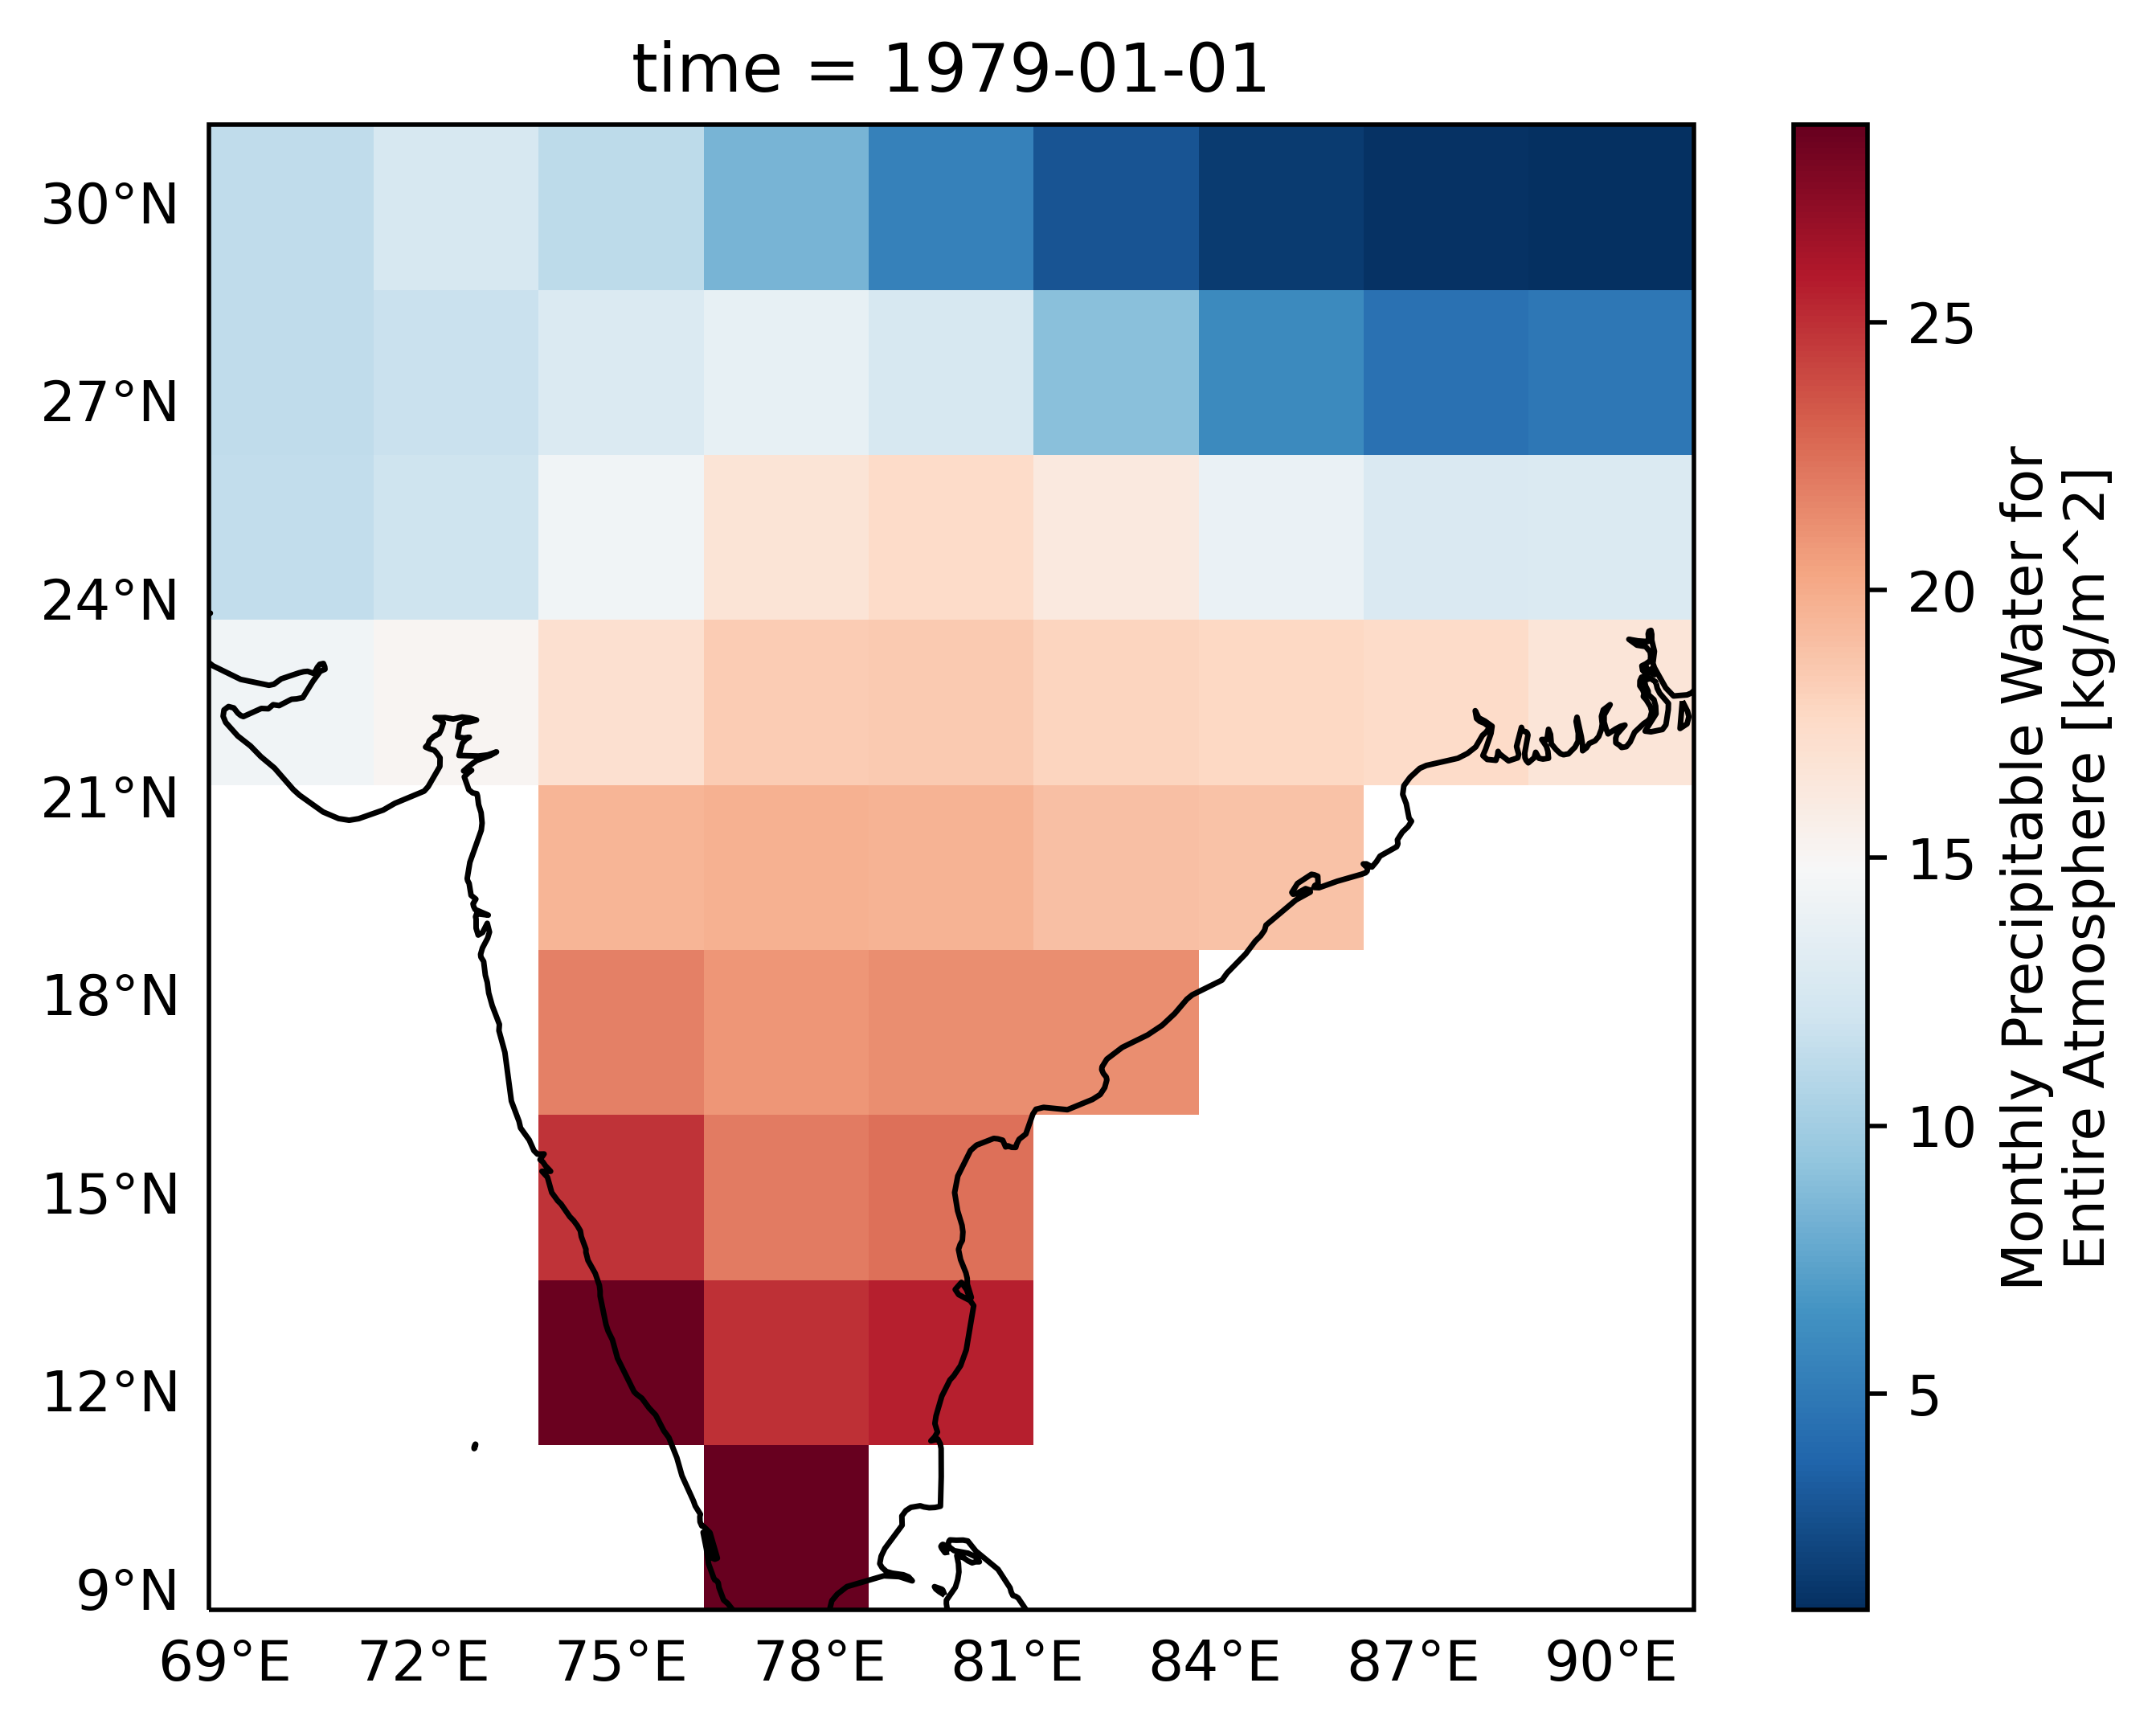

In [10]:
ax = plt.axes(projection = ccrs.PlateCarree())
gls = ax.gridlines(draw_labels=True, color="none") #color='none' makes gridlines invisible
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax.coastlines()
deca.where(mask2>0).plot(cmap='RdBu_r') # 'RdBu', 'RdBu_r' are the best colourmaps, BrBG
plt.show()

# IMD and ERA comparison

In [2]:
path = '/media/rakshith/Seagate Expansion Drive/IMD' #Daily dataset
fi = '/RFone_imd_rf_1x1_*.nc'

In [3]:
imd=xr.open_mfdataset(path+fi)
era = xr.open_dataset('/media/rakshith/Seagate Expansion Drive/IMD/ERA5 2015-2021 precipitation.nc')

In [4]:
year='2010'
era2 = era.sel(time=year)
imd2 = imd.sel(TIME=year, LONGITUDE=slice(70, 90), LATITUDE=slice(10, 30)) #selecting all data in 2016

KeyError: "not all values found in index 'time'. Try setting the `method` keyword argument (example: method='nearest')."

In [6]:
#Mask for ERA
lon_grid, lat_grid = np.meshgrid(era2.longitude, era2.latitude) #creating a land sea mask
eramask = globe.is_land(lat_grid, lon_grid)
#Mask for IMD
lon_grid, lat_grid = np.meshgrid(imd2.LONGITUDE, imd2.LATITUDE) #creating a land sea mask
imdmask = globe.is_land(lat_grid, lon_grid)

In [7]:
imd3 = imd2.where(imdmask>0).mean(dim=['LONGITUDE', 'LATITUDE']) #Spatial averaging over land points only
era3 = 86400*era2.where(eramask>0).mean(dim=['longitude', 'latitude'])

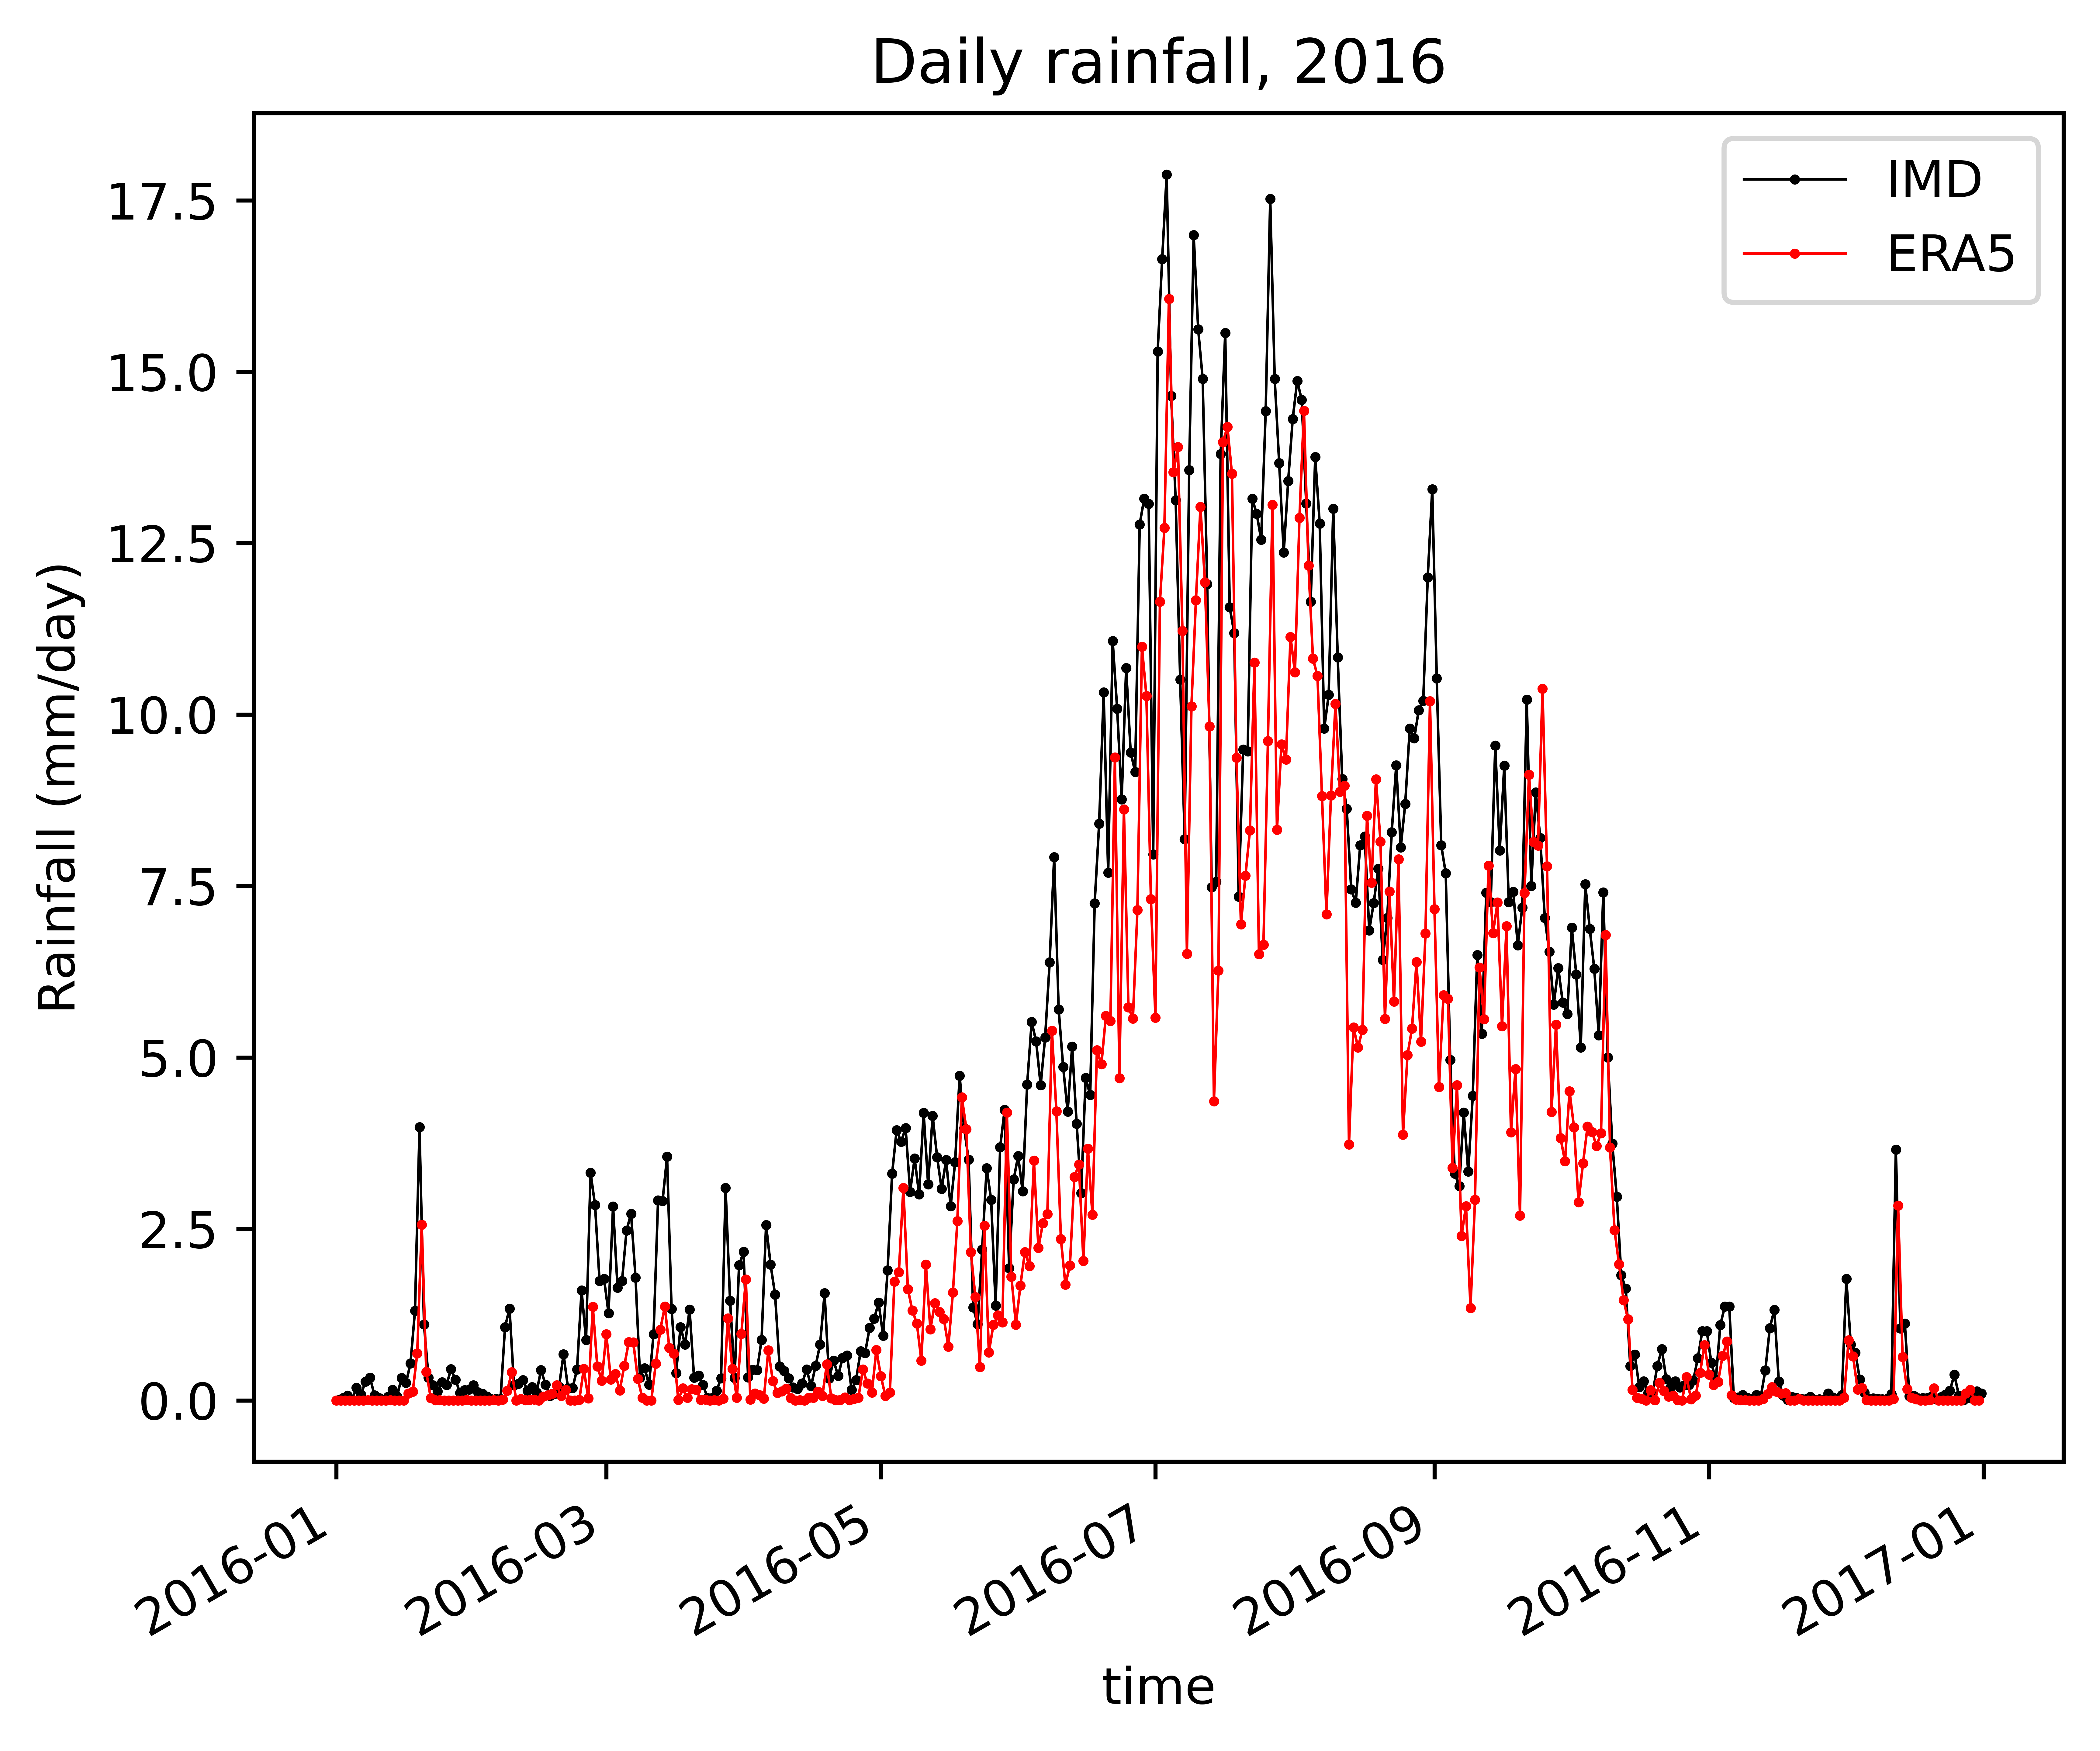

In [8]:
plot_settings = {'linewidth':0.5, 'marker':'o', 'markersize':1} #Define a dictionary to have common plot settings

era3.mtpr.plot(c='black', label='IMD', **plot_settings)
imd3.RAINFALL.plot(c='r', label='ERA5', **plot_settings)
plt.ylabel('Rainfall (mm/day)')
plt.title('Daily rainfall, ' + year)
plt.legend()
plt.show()

In [9]:
#g = '/media/rakshith/Seagate Expansion Drive/mraks/land sea ERA.nc'
#h = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
g = '/media/rakshith/Windows/Users/mraks/land sea ERA.nc'
h = '/media/rakshith/Windows/Users/mraks/TGMS ERA 1959-2021, India only.nc'
datasets = [g,h]
ds = xr.open_mfdataset(datasets)

#Mask for ERA
lon_grid, lat_grid = np.meshgrid(ds.longitude, ds.latitude) #creating a land sea mask
eramask = globe.is_land(lat_grid, lon_grid)

In [10]:
year='2016'
ds2 = ds.sel(time=year)
ds3 = 86400*ds2.where(eramask>0).mean(dim=['longitude', 'latitude'])
ds4 = 86400*ds2.mean(dim=['longitude', 'latitude'])

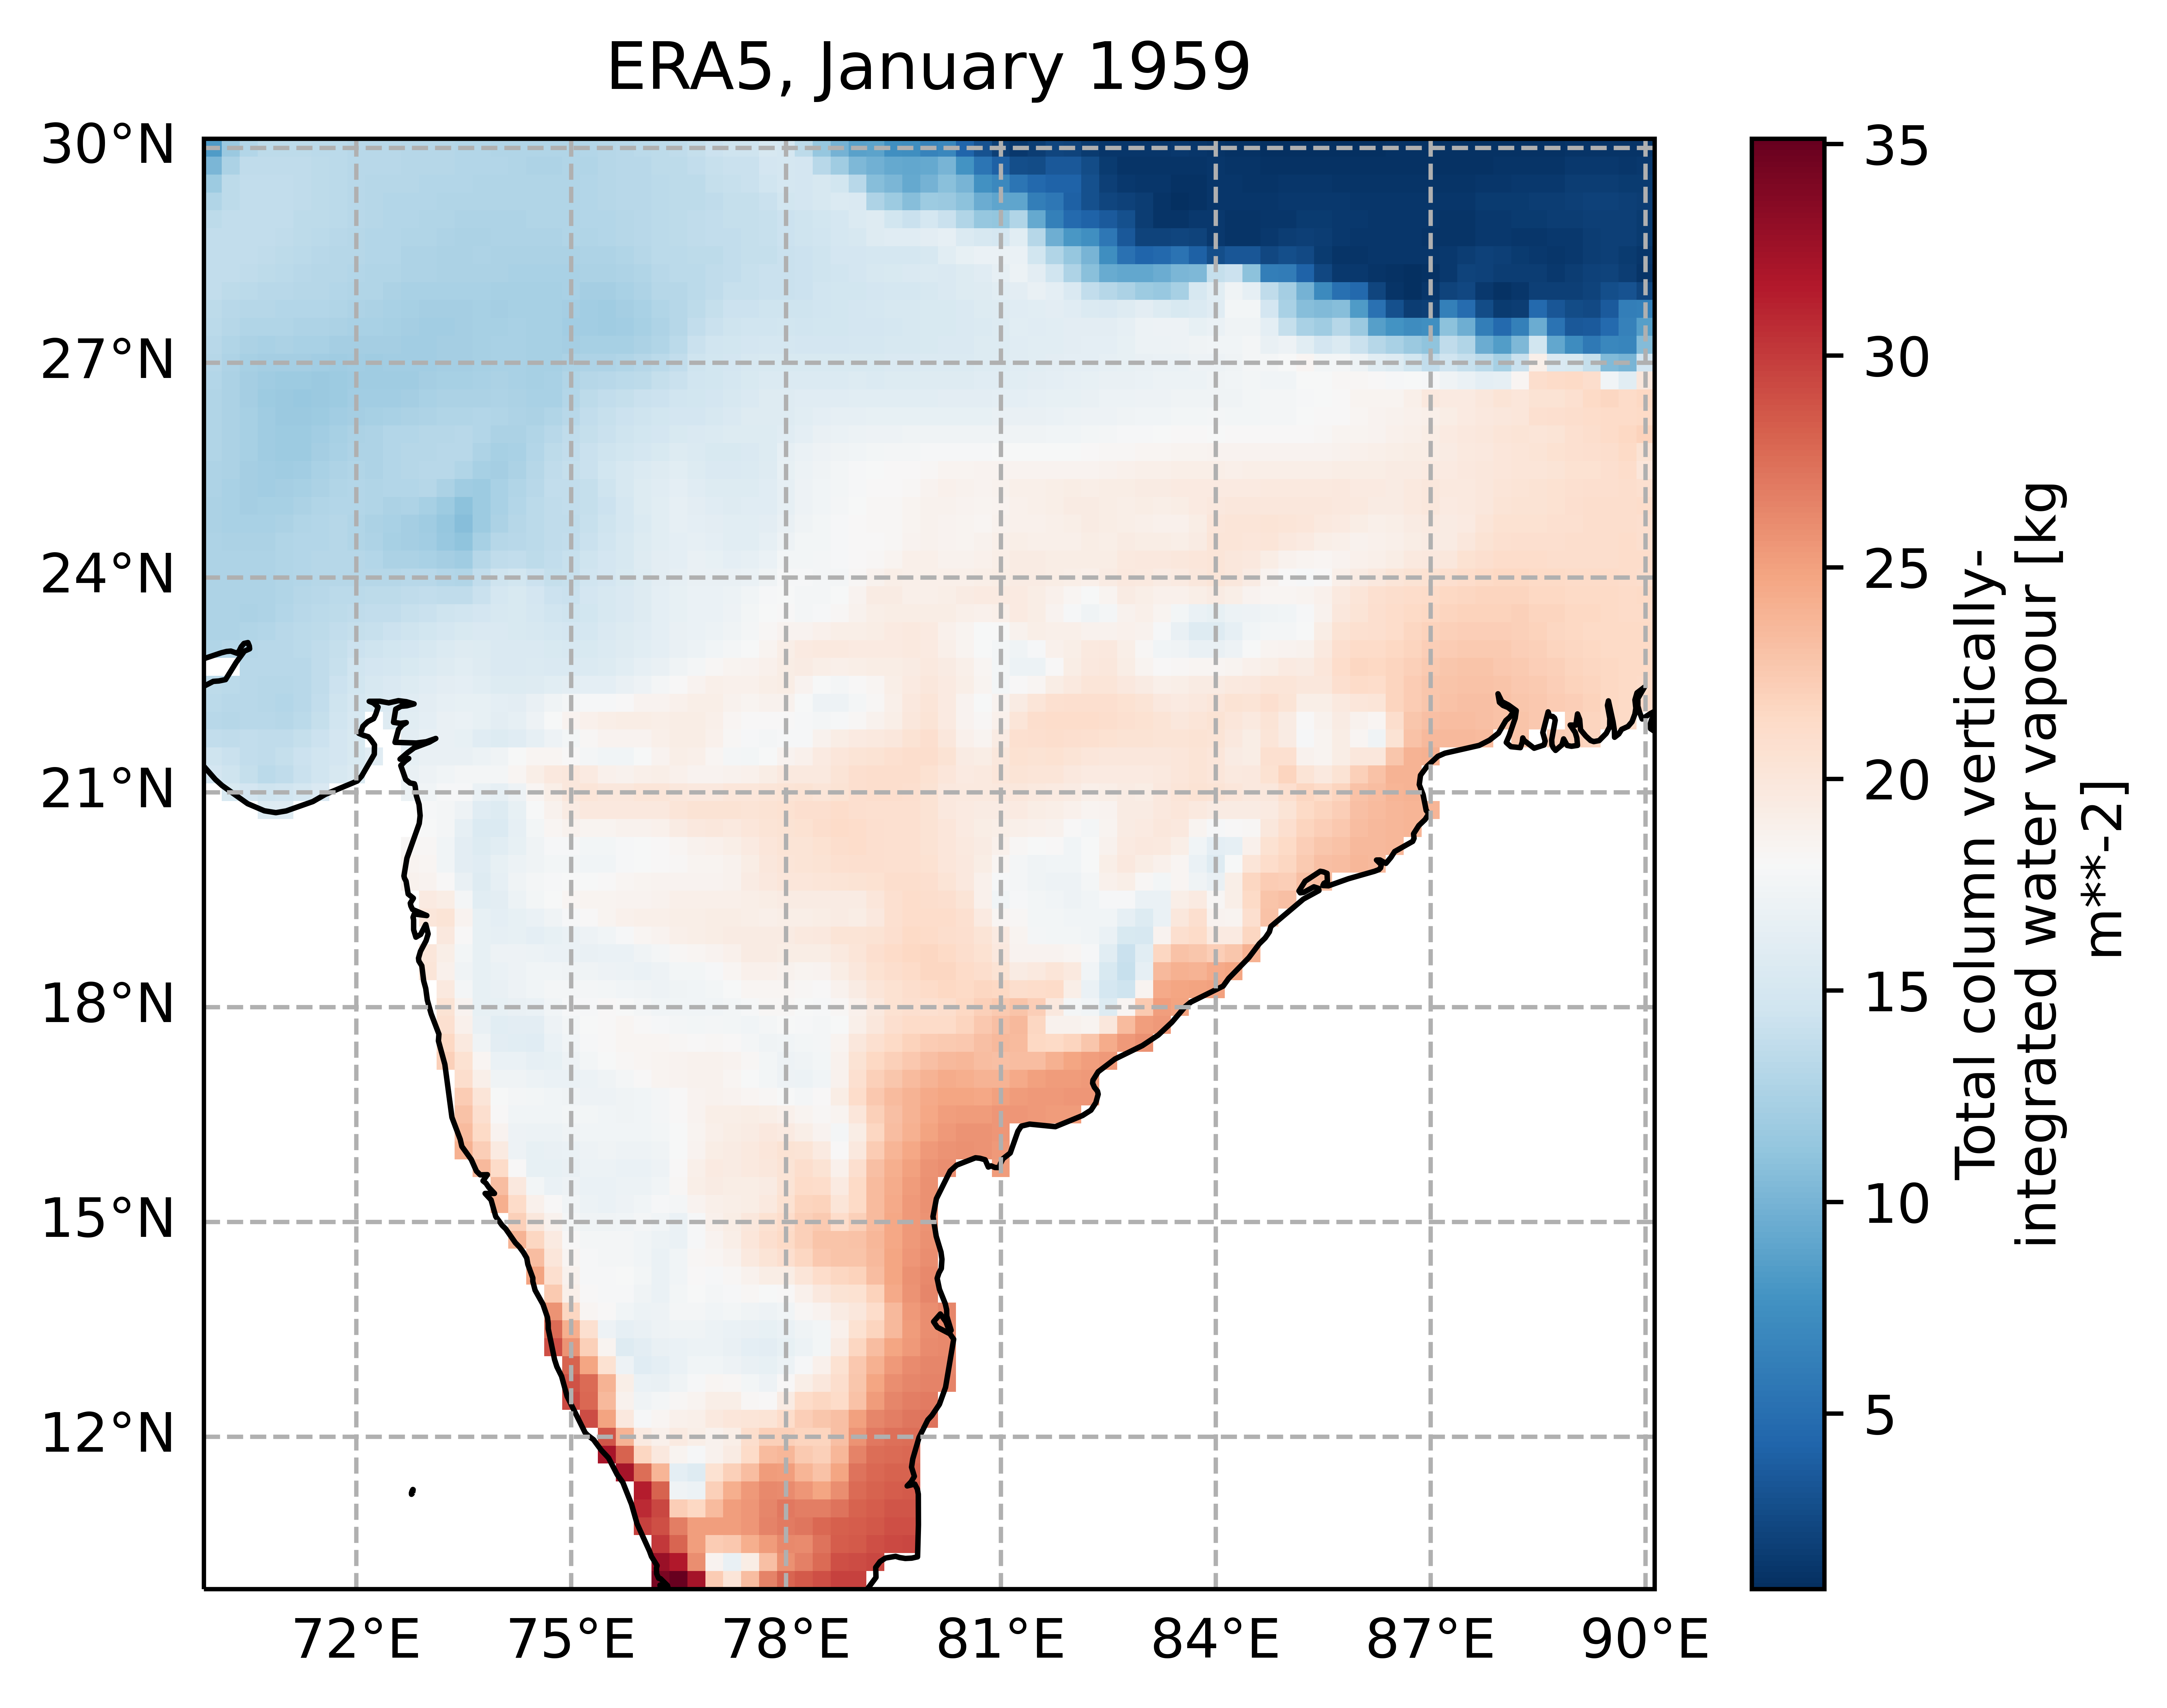

In [11]:
inte = ds.tcwv.sel(time='1959-01-01')
ax = plt.axes(projection = ccrs.PlateCarree())
gls = ax.gridlines(draw_labels=True, linestyle='--') #color='none' makes gridlines invisible
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax.coastlines()
inte.where(eramask>0).plot(cmap='RdBu_r') # 'RdBu', 'RdBu_r' are the best colourmaps, BrBG
plt.title('ERA5, January 1959')
plt.show()

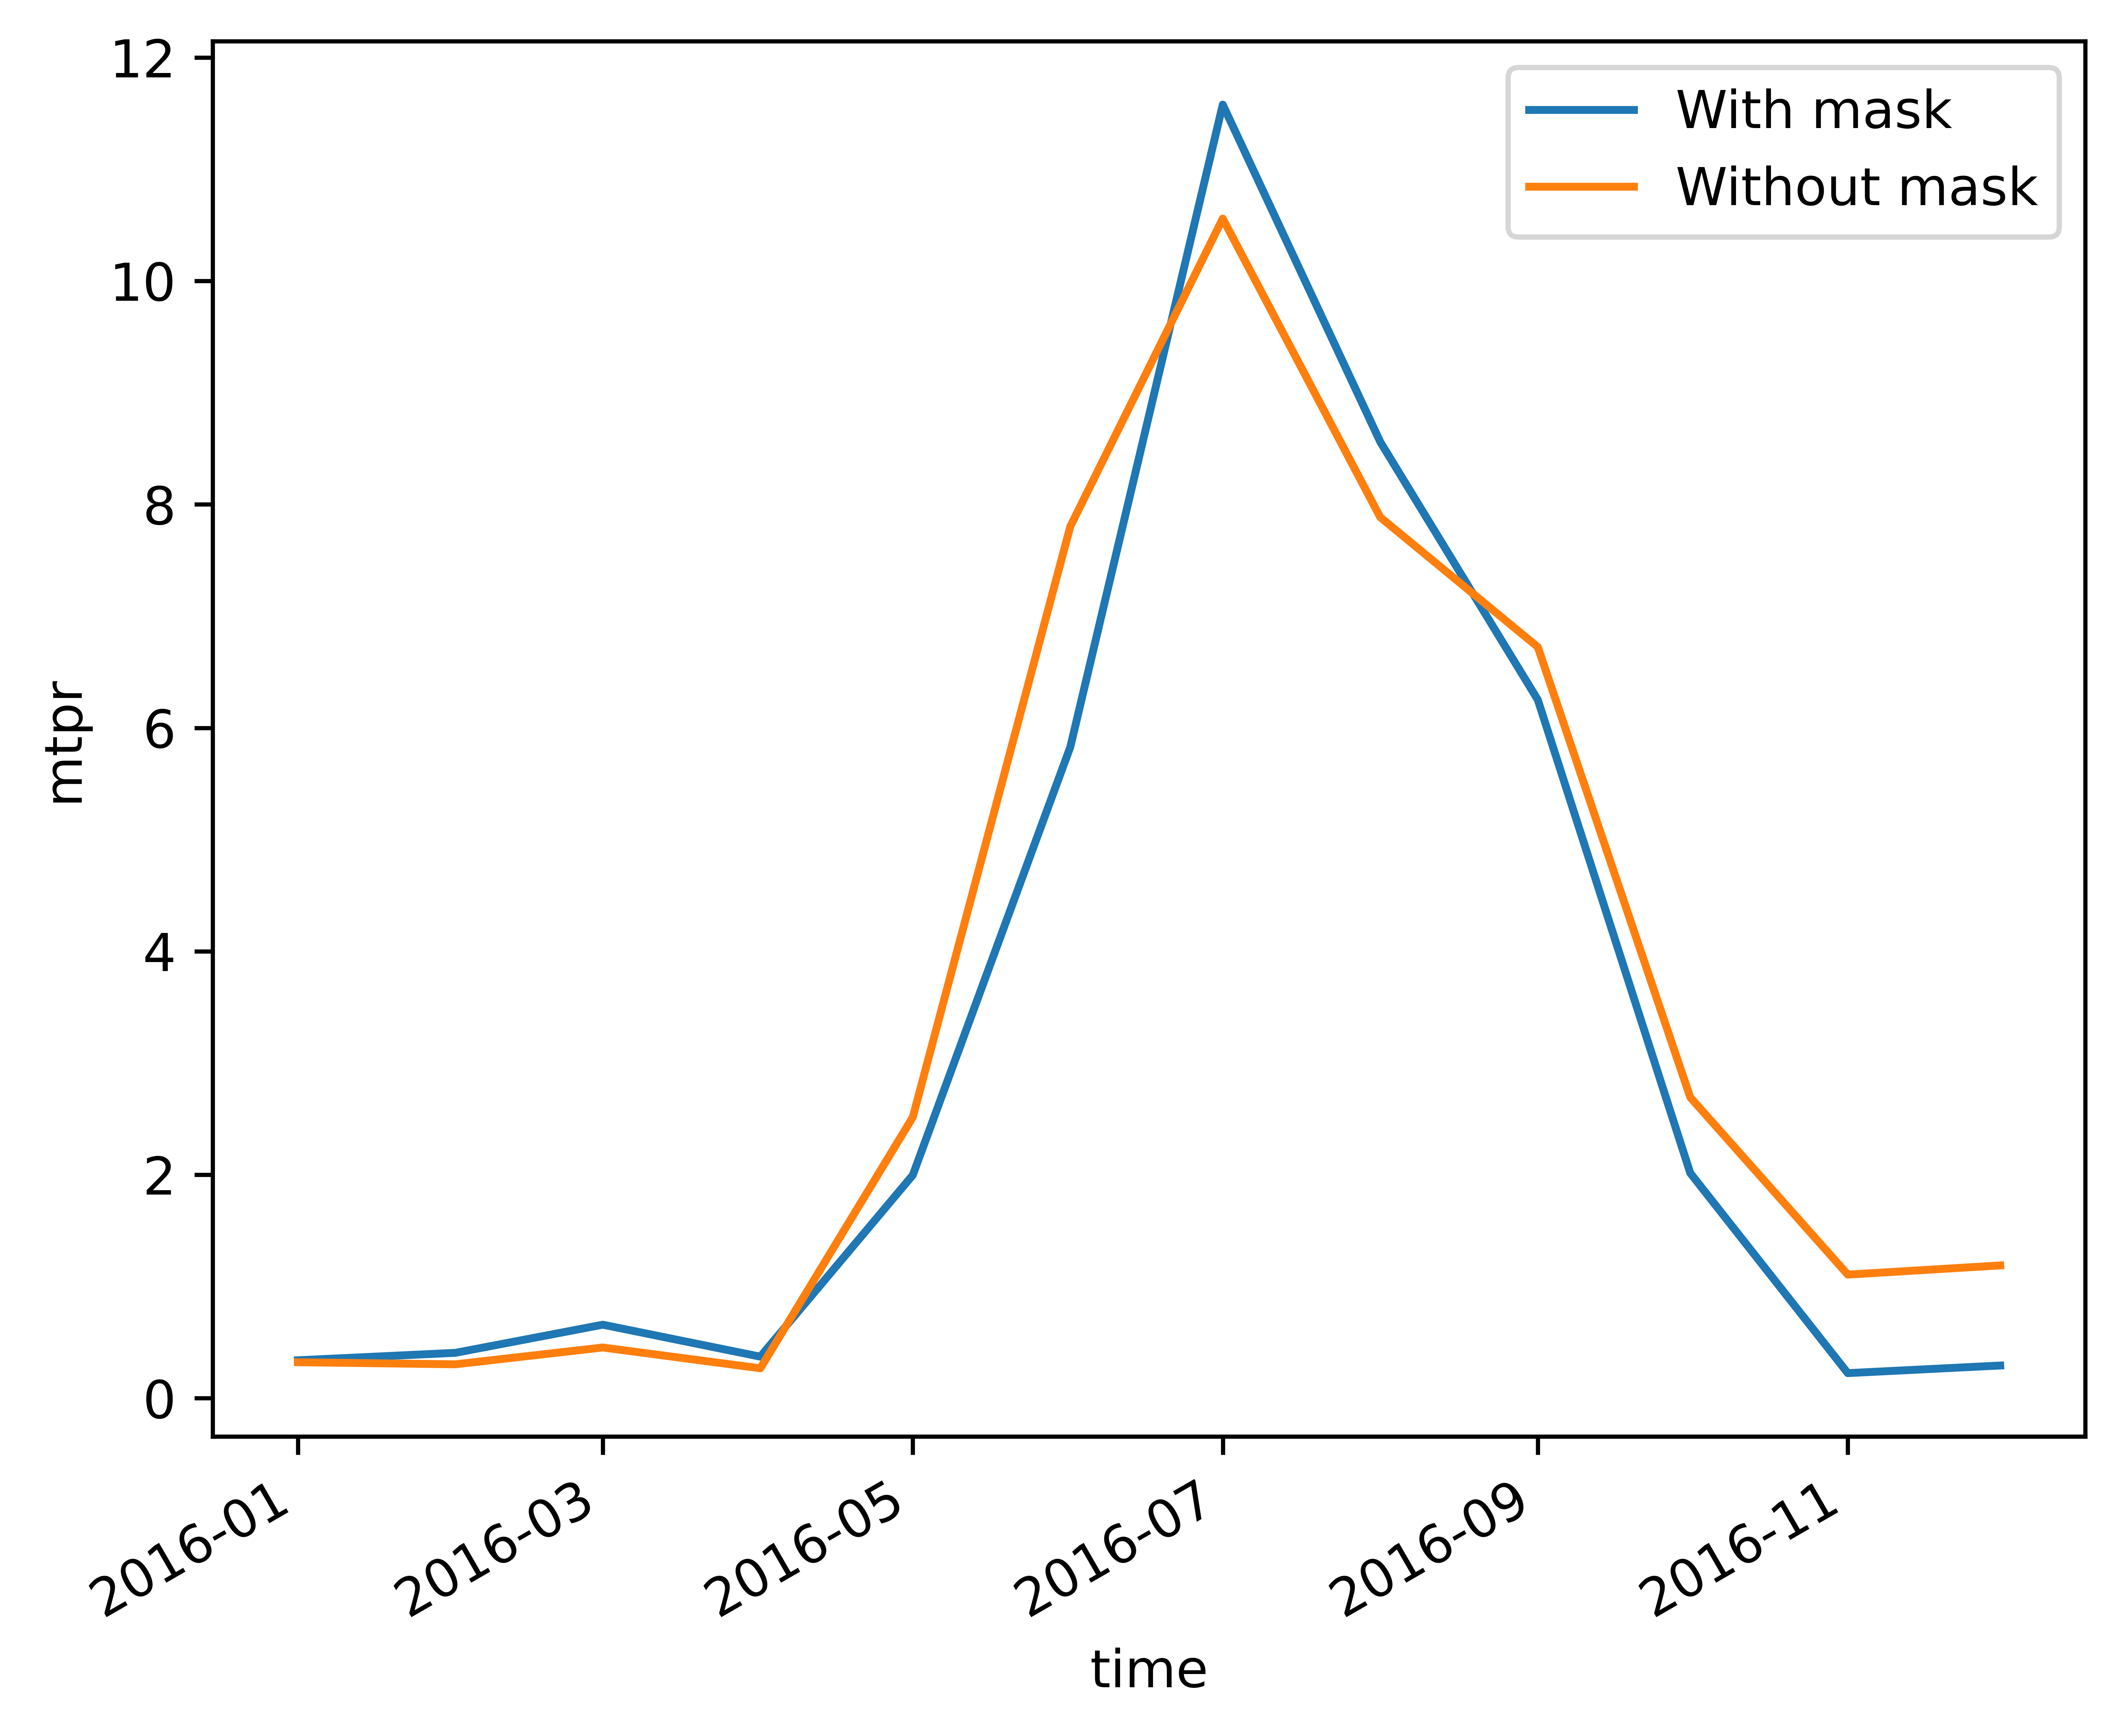

In [12]:
ds3.mtpr.plot()
ds4.mtpr.plot()
plt.legend(['With mask', 'Without mask'])
plt.show()

# Monthly means over land points

In [17]:
monera = ds3.groupby('time.month').mean().squeeze()
monimd = imd3.groupby('TIME.month').mean().squeeze()
X = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']

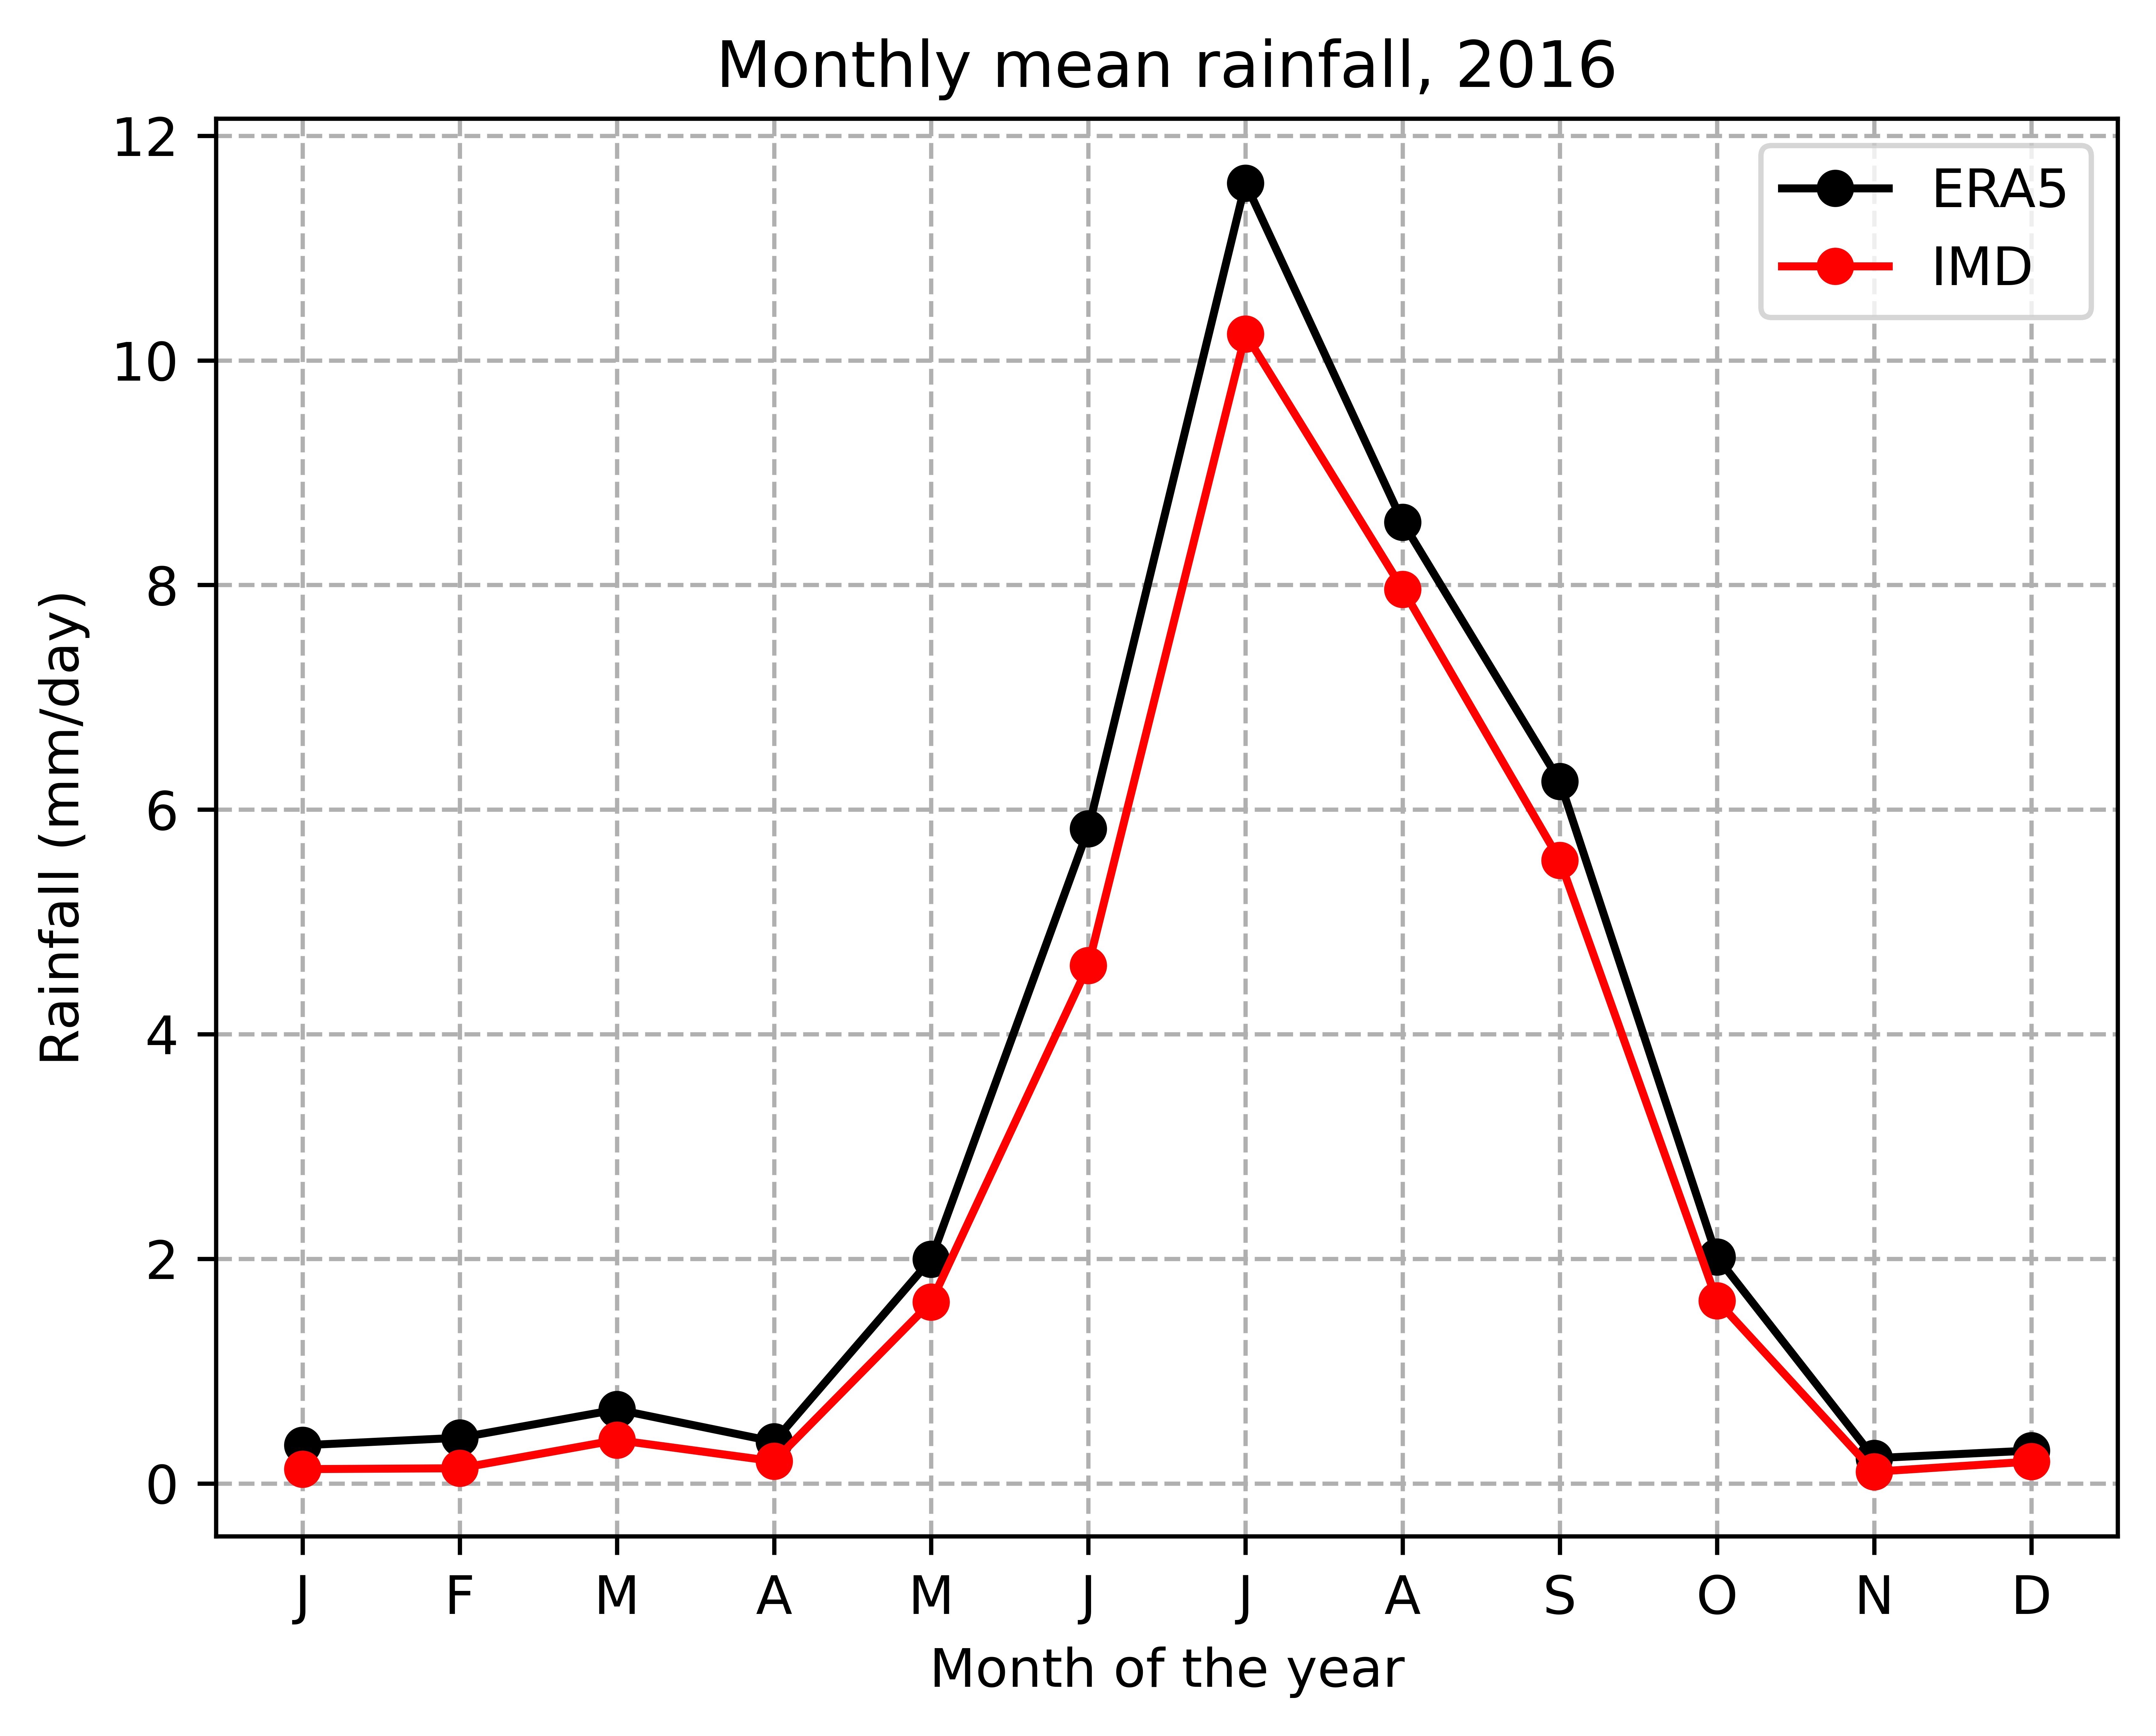

In [21]:
monera.mtpr.plot(c='black', label='ERA5', marker='o')
monimd.RAINFALL.plot(c='r', label='IMD', marker='o')
plt.ylabel('Rainfall (mm/day)')
plt.xlabel('Month of the year')
plt.title('Monthly mean rainfall, ' + year)
plt.xticks(monimd.month,X)
plt.grid(linestyle = '--')
plt.legend()
plt.show()

In [29]:
x = '/home/rakshith/Desktop/pe_um.nc'
pe = xr.open_dataset(x)

In [30]:
l=[]
for i in pe.lon:
    if i>180:
        l.append(i-360)
    else:
        l.append(i)   

In [31]:
lon_grid, lat_grid = np.meshgrid(l, pe.lat) #creating a land sea mask
pemask = globe.is_land(lat_grid, lon_grid)

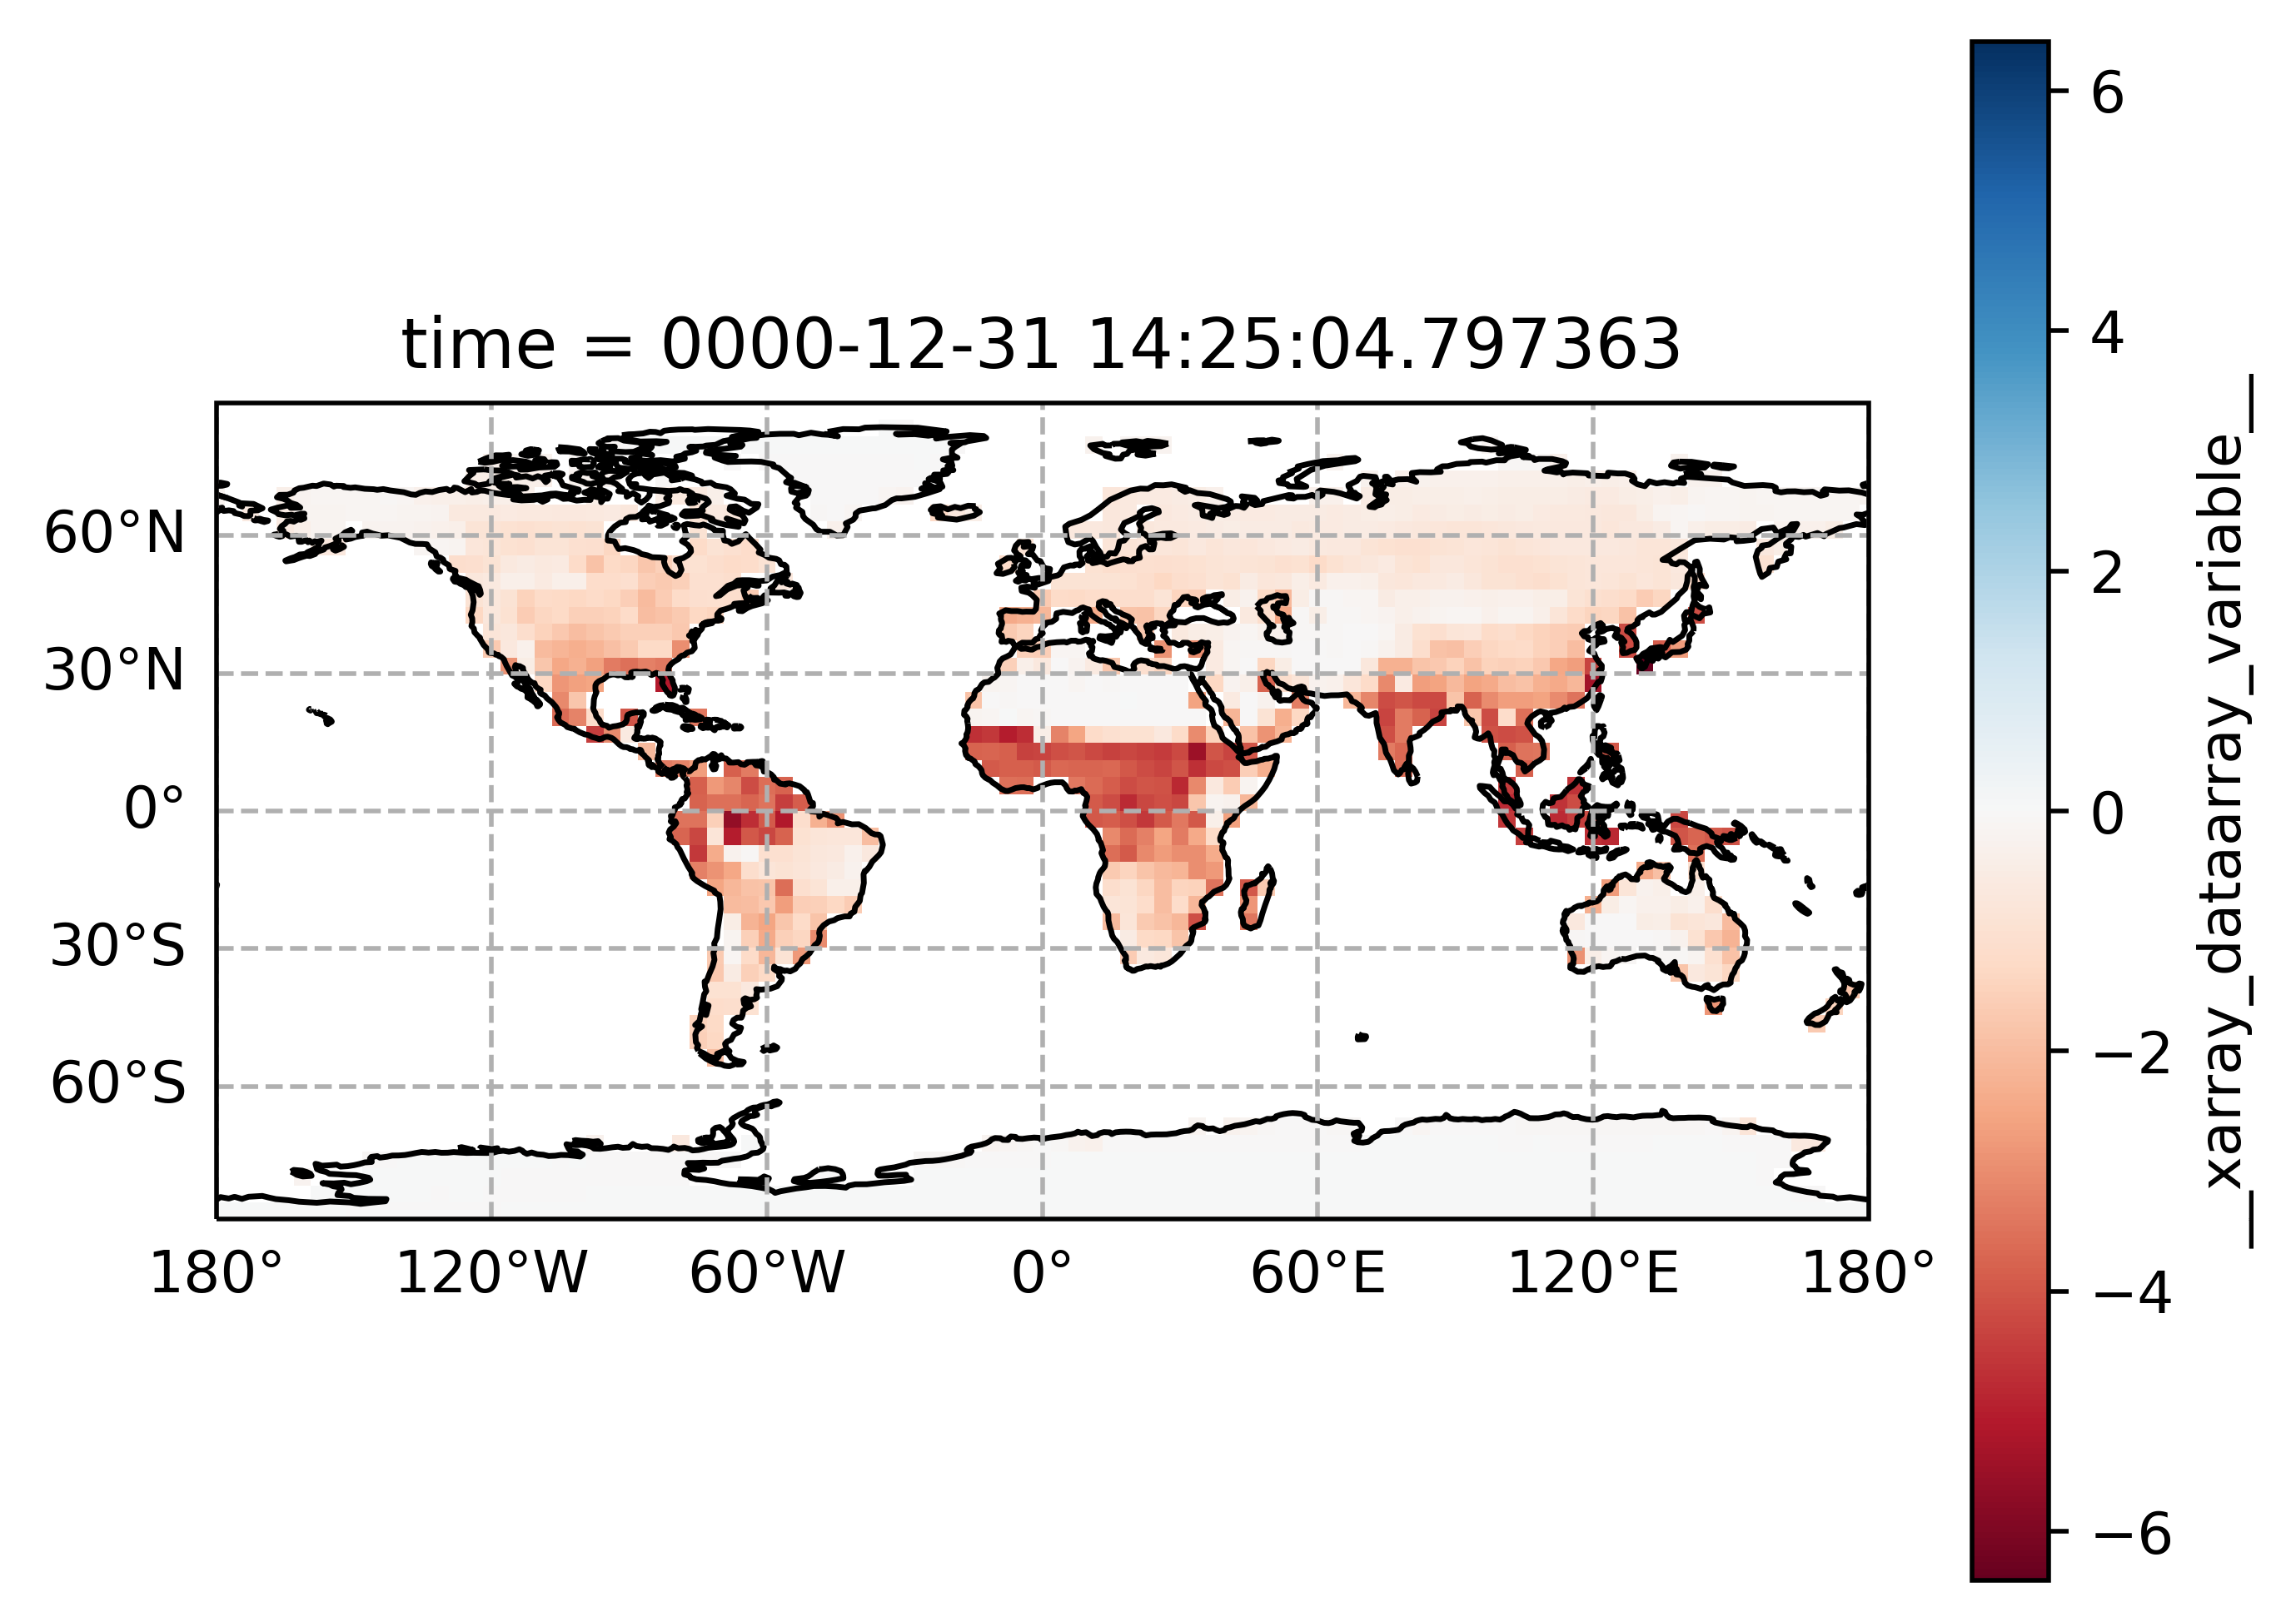

In [32]:
ax = plt.axes(projection = ccrs.PlateCarree())
gls = ax.gridlines(draw_labels=True, linestyle='--') #color='none' makes gridlines invisible
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax.coastlines()
pe.__xarray_dataarray_variable__[8,:,:].where(pemask>0).plot(cmap='RdBu')
plt.show()